# Chapter 8 - Signal Processing and Time Series

## Overview
Signal processing is a subdomain of electrical engineering and applied mathematics that focuses on analyzing and processing time-related variables or variables that change over time. It includes both analog and digital signals:
- **Analog Signals**: Non-digitized signals, such as radio or telephone signals.
- **Digital Signals**: Digitized, discrete, time-sampled signals, such as those from computers or digital devices.

Time-series analysis is a subset of signal processing that deals with ordered or sequential observations over time. The time component is crucial for identifying relationships and patterns in the data.

### Applications of Time-Series Analysis:
- Production and sales forecasting
- Stock price prediction (hourly or daily)
- Economic forecasting
- Census analysis
- Weather and rainfall prediction

## Libraries Covered
This chapter focuses on signal processing and time-series operations using the following Python libraries:
- **NumPy**
- **SciPy**
- **pandas**
- **statsmodels**

These tools are essential for data analysts to uncover trends, patterns, and make forecasts.

---

## Topics Covered

1. **The statsmodels Modules**  
    Introduction to the `statsmodels` library for statistical modeling and time-series analysis.

2. **Moving Averages**  
    Techniques for smoothing data to identify trends over time.

3. **Window Functions**  
    Applying windowing techniques to data for localized analysis.

4. **Defining Cointegration**  
    Understanding relationships between two or more time-series that move together over time.

5. **STL Decomposition**  
    Seasonal-Trend decomposition using LOESS to separate time-series into trend, seasonal, and residual components.

6. **Autocorrelation**  
    Measuring the correlation of a time-series with its own past values.

7. **Autoregressive Models**  
    Introduction to autoregressive models for time-series forecasting.

8. **ARMA Models**  
    Combining autoregressive (AR) and moving average (MA) models for time-series analysis.

9. **Generating Periodic Signals**  
    Creating periodic signals for analysis and testing.

10. **Fourier Analysis**  
     Decomposing signals into their frequency components using Fourier Transform.

11. **Spectral Analysis Filtering**  
     Filtering signals to isolate specific frequency components.

---

## Key Takeaways
- Signal processing and time-series analysis are essential for understanding time-dependent data.
- The time component plays a critical role in identifying trends, patterns, and making predictions.
- Python libraries like NumPy, SciPy, pandas, and statsmodels provide powerful tools for signal processing and time-series operations.

This chapter equips you with the knowledge to analyze and forecast data such as sales, stock prices, weather, and more.

### Moving Averages

Moving averages, also known as rolling means, are time-series filters that smooth out short-term fluctuations and highlight longer-term trends in data. They work by averaging a set or window of observations over time. This technique is particularly useful for filtering impulsive responses and identifying trends.

#### Key Concepts:
- **Window Size**: Determines the number of observations included in each average calculation.
- **Sliding Window**: The window slides over the data, calculating the average for each period.

#### Types of Moving Averages:
1. **Simple Moving Average (SMA)**: Averages the values within the window equally.
2. **Centered Moving Average**: Aligns the window symmetrically around the current observation.
3. **Weighted Moving Average**: Assigns different weights to observations, typically giving more importance to recent values.
4. **Double Moving Average**: Applies the moving average twice to smooth the data further.

The simple moving average can be represented mathematically as:

\[
SMA_t = \frac{1}{n} \sum_{i=t-n+1}^{t} x_i
\]

Where:
- \(SMA_t\) is the simple moving average at time \(t\),
- \(n\) is the window size,
- \(x_i\) are the observations within the window.

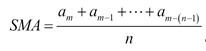

#### Implementation:
To calculate the moving average, we use the `rolling()` function in pandas. Before applying the moving average, we will first load the data and visualize it.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 2.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


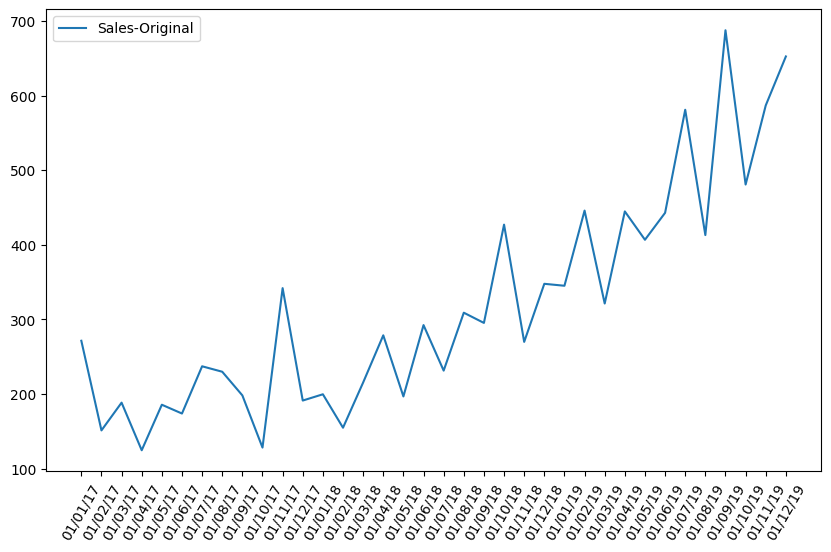

In [2]:
# Install missing library
%pip install statsmodels

# Import necessary libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Read dataset
sales_data = pd.read_csv('sales.csv')

# Setting figure size
plt.figure(figsize=(10, 6))
# Plot original sales data
plt.plot(sales_data['Time'], sales_data['Sales'], label="Sales-Original")
# Rotate x-axis labels
plt.xticks(rotation=60)
# Add legends
plt.legend()
# Display the plot
plt.show()

Now, we will compute the moving average using the rolling function:

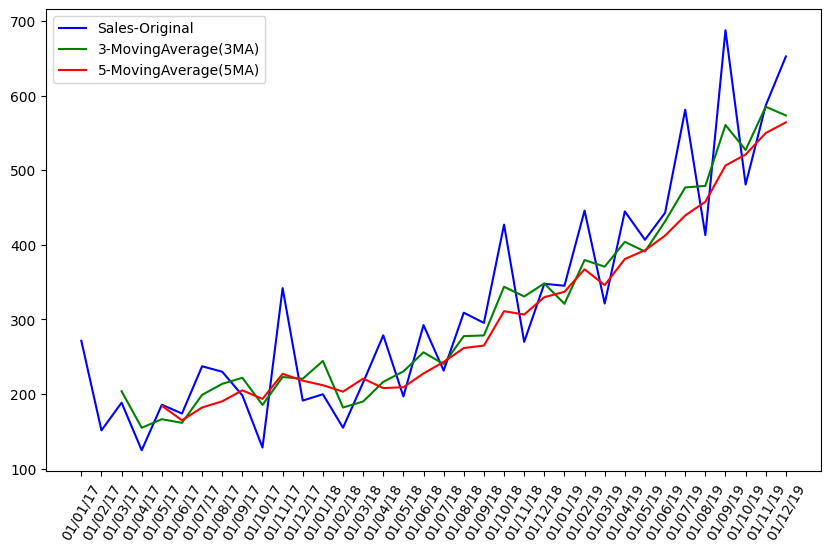

In [4]:
# Moving average with window 3
sales_data['3MA']=sales_data['Sales'].rolling(window=3).mean()

# Moving average with window 5
sales_data['5MA']=sales_data['Sales'].rolling(window=5).mean()

# Setting figure size
plt.figure(figsize=(10,6))

# Plot original sales data
plt.plot(sales_data['Time'], sales_data['Sales'], label="Sales-Original",color="blue")

# Plot 3-Moving Average of sales data
plt.plot(sales_data['Time'], sales_data['3MA'], label="3-MovingAverage(3MA)", color="green")

# Plot 5-Moving Average of sales data
plt.plot(sales_data['Time'], sales_data['5MA'], label="5-MovingAverage(5MA)", color="red")

# Rotate xlabels
plt.xticks(rotation=60)
# Add legends
plt.legend()

# Display the plot
plt.show()

### Window Functions

Window functions are mathematical functions applied to a subset of data points (a "window") to compute weights or smooth data. These functions are widely used in spectral analysis, filter design, and time-series analysis. For more background, refer to [Window Function - Wikipedia](http://en.wikipedia.org/wiki/Window_function).

#### Common Window Functions:
1. **Boxcar Window**: A rectangular window where all weights are equal.
    \[
    w(n) = 1
    \]

2. **Triangular Window**: Shaped like a triangle, it assigns weights that increase linearly up to the center and then decrease linearly.
    \[
    w(n) = 1 - \frac{|n - (N-1)/2|}{(N-1)/2}
    \]

3. **Bartlett Window**: A special case of the triangular window where \(L = N-1\).
    \[
    w(n) = 1 - \frac{|n - (N-1)/2|}{(N-1)/2}
    \]

#### Implementation in pandas:
The `DataFrame.rolling()` function in the `pandas` module supports various window functions using the `win_type` parameter. The `window` parameter defines the size of the window, making it easy to apply different window functions.

For example:

<Axes: xlabel='Time'>

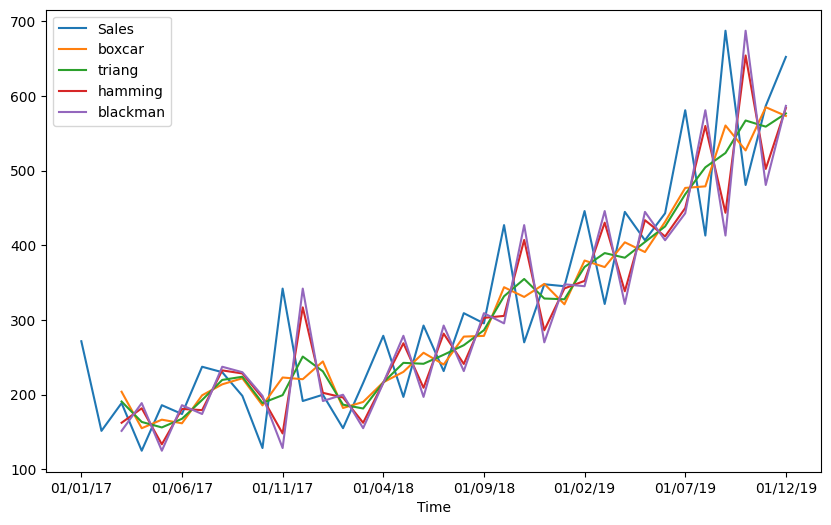

In [5]:
# import needful libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Read dataset
sales_data = pd.read_csv('sales.csv', index_col ="Time")

# Apply all the windows on given DataFrame
sales_data['boxcar']=sales_data.Sales.rolling(3, win_type ='boxcar').mean()
sales_data['triang']=sales_data.Sales.rolling(3, win_type ='triang').mean()
sales_data['hamming']=sales_data.Sales.rolling(3, win_type
='hamming').mean()
sales_data['blackman']=sales_data.Sales.rolling(3, win_type
='blackman').mean()

#Plot the rolling mean of all the windows
sales_data.plot(kind='line',figsize=(10,6))

### Defining Cointegration

Cointegration is a statistical concept that measures the relationship between two time series. It can be thought of as a more robust metric than correlation for defining the relatedness of two time series. While correlation measures the direction and strength of the relationship, cointegration focuses on the long-term equilibrium between the two series.

#### Key Concept:
Cointegration occurs when a linear combination of two non-stationary time series becomes stationary. In other words, even if the individual time series are non-stationary, their linear relationship exhibits stationary behavior. Mathematically, this can be expressed as:

\[
y(t) - a \cdot x(t)
\]

Where:
- \(y(t)\) and \(x(t)\) are the two time series,
- \(a\) is a constant.

#### Analogy:
Consider a drunk man and his dog out on a walk:
- **Correlation**: Indicates whether they are moving in the same direction.
- **Cointegration**: Describes the distance between the man and his dog over

In [9]:
# Import required library
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts

# Calculate ADF function
def calc_adf(x, y):
	# Perform Ordinary Least Squares regression
	result = sm.OLS(x, y).fit()
	# Return the Augmented Dickey-Fuller test result on residuals
	return ts.adfuller(result.resid)


Load the Sunspot data into a NumPy array:


In [10]:
# Read the Dataset
data = sm.datasets.sunspots.load_pandas().data.values
N = len(data)

Generate a sine wave and calculate the cointegration of the sine with itself:


In [12]:
# Import numpy
import numpy as np

# Create Sine wave and apply ADF test
t = np.linspace(-2 * np.pi, 2 * np.pi, N)
sine = np.sin(np.sin(t))
print("Self ADF", calc_adf(sine, sine))

Self ADF (np.float64(nan), np.float64(nan), 0, 308, {'1%': np.float64(-3.45176116018037), '5%': np.float64(-2.870970093607691), '10%': np.float64(-2.571794416006072)}, np.float64(-21598.896016765088))


Add noise to the sine to demonstrate how noise will influence the signal:

In [14]:
# Apply ADF test on Sine and Sine with noise
noise = np.random.normal(0, .01, N)
print("ADF sine with noise", calc_adf(sine, sine + noise))

ADF sine with noise (np.float64(-17.240284185933167), np.float64(6.113397925500783e-30), 0, 308, {'1%': np.float64(-3.45176116018037), '5%': np.float64(-2.870970093607691), '10%': np.float64(-2.571794416006072)}, np.float64(-1863.9752827141833))


In [15]:
# Apply ADF test on Sine and Cosine with noise
cosine = 100 * np.cos(t) + 10
print("ADF sine vs cosine with noise", calc_adf(sine, cosine +
noise))

ADF sine vs cosine with noise (np.float64(-13.859515526897146), np.float64(6.769875988361344e-26), 16, 292, {'1%': np.float64(-3.4529449243622383), '5%': np.float64(-2.871489553425686), '10%': np.float64(-2.572071437887033)}, np.float64(-10723.68812500229))


In [16]:
print("Sine vs sunspots", calc_adf(sine, data))

Sine vs sunspots (np.float64(-6.724269181070101), np.float64(3.421081191554902e-09), 16, 292, {'1%': np.float64(-3.4529449243622383), '5%': np.float64(-2.871489553425686), '10%': np.float64(-2.572071437887033)}, np.float64(-1102.5867415291168))


### STL Decomposition

#### Overview
STL stands for **Seasonal and Trend decomposition using LOESS**. It is a time-series decomposition method that splits an observed signal into three components:
1. **Trend**: The long-term progression of the series.
2. **Seasonality**: The repeating patterns or cycles in the data.
3. **Residual**: The remaining noise or irregularities after removing trend and seasonality.

#### Key Features
- **Non-linear Relationships**: STL can estimate non-linear trends in the data.
- **Flexible Seasonality**: It can handle any type of seasonality, making it suitable for a wide range of time-series data.

#### Implementation in Python
The `statsmodels.tsa.seasonal` subpackage provides the `seasonal_decompose` method for performing STL decomposition. This method allows users to decompose a time-series signal into its trend, seasonal, and residual components.

#### Use Cases
- Identifying trends in sales, stock prices, or weather data.
- Analyzing seasonal patterns in time-series data.
- Removing seasonality to focus on the underlying trend or residuals.

#### Example Workflow
1. Import the necessary libraries.
2. Load the time-series data.
3. Apply the `seasonal_decompose` method to decompose the signal.
4. Visualize the trend, seasonality, and residual components.

#### Advantages
- Handles complex seasonality effectively.
- Provides clear insights into the structure of time-series data.
- Useful for preprocessing data before forecasting or anomaly detection.

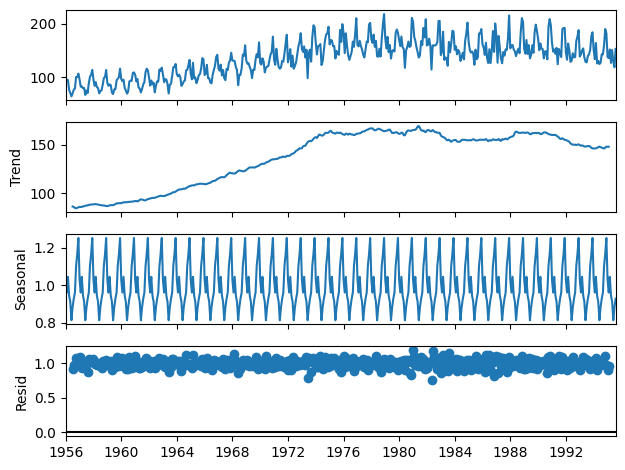

In [17]:
# import needful libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
# Read the dataset
data = pd.read_csv('beer_production.csv')
data.columns= ['date','data']
# Change datatype to pandas datetime
data['date'] = pd.to_datetime(data['date'])
data=data.set_index('date')
# Decompose the data
decomposed_data = seasonal_decompose(data, model='multiplicative')
# Plot decomposed data
decomposed_data.plot()
# Display the plot
plt.show()

### Autocorrelation

#### Overview
Autocorrelation, also known as lagged correlation, measures the correlation between a time series and its lagged version. It helps identify trends and patterns in the dataset by analyzing how the current values of a time series relate to its past values.

#### Formula
The autocorrelation formula is mathematically expressed as:

\[
r_k = \frac{\sum_{t=1}^{N-k} (x_t - \bar{x})(x_{t+k} - \bar{x})}{\sum_{t=1}^{N} (x_t - \bar{x})^2}
\]

Where:
- \(r_k\) is the autocorrelation at lag \(k\),
- \(x_t\) is the value of the time series at time \(t\),
- \(\bar{x}\) is the mean of the time series,
- \(N\) is the total number of observations.

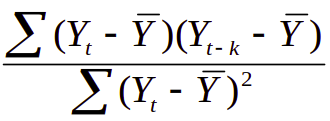


#### Implementation
1. **Using NumPy**: The `numpy.correlate()` function can be used to compute the actual autocorrelation of a time series.
2. **Visualization**: The `autocorrelation_plot()` function from the `pandas.plotting` module provides a direct way to visualize the autocorrelation.

#### Use Case
To compute and visualize the autocorrelation of sunspot cycles, we can use the following steps:
1. Load the sunspot data.
2. Compute the autocorrelation using `numpy.correlate()`.
3. Visualize the autocorrelation using `autocorrelation_plot()`.

#### Applications
- Identifying periodic patterns in time-series data.
- Detecting seasonality in datasets.
- Evaluating the persistence of trends over time.

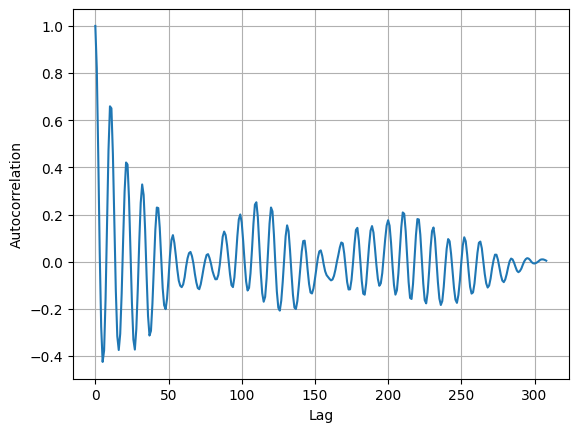

In [19]:
# import needful libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
# Read the dataset
data = sm.datasets.sunspots.load_pandas().data
# Calculate autocorrelation using numpy
dy = data.SUNACTIVITY - np.mean(data.SUNACTIVITY)
dy_square = np.sum(dy ** 2)
# Cross-correlation
sun_correlated = np.correlate(dy, dy, mode='full')/dy_square
result = sun_correlated[int(len(sun_correlated)/2):]
# Diplay the Chart
plt.plot(result)
# Display grid
plt.grid(True)
# Add labels
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
# Display the chart
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

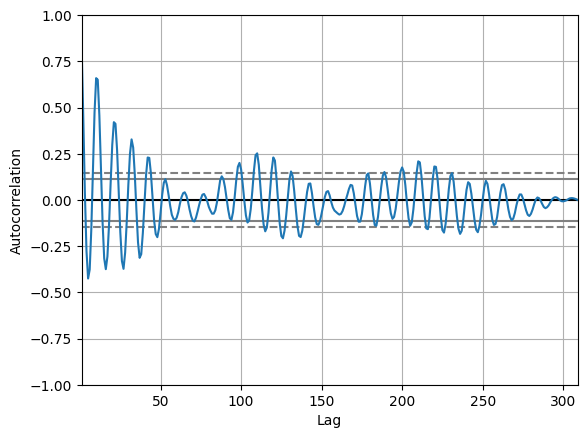

In [20]:
from pandas.plotting import autocorrelation_plot
# Plot using pandas function
autocorrelation_plot(data.SUNACTIVITY)

### Autoregressive models
Autoregressive models are time-series models used to predict future incidents. The
following formula shows this:

Import the libraries and read the dataset:

In [25]:
# Install missing libraries
%pip install statsmodels

# Import necessary libraries
from statsmodels.tsa.ar_model import AutoReg
import statsmodels.api as sm

# Read the dataset
data = sm.datasets.sunspots.load_pandas().data

# Split data into train and test set
train_ratio = 0.8
train = data[:int(train_ratio * len(data))]
test = data[int(train_ratio * len(data)):]

# AutoRegression Model training
ar_model = AutoReg(train.SUNACTIVITY, lags=1).fit()
# Print lags and coefficients
print("Number of Lags:", ar_model.ar_lags)
print("Model Coefficients:\n", ar_model.params)

Note: you may need to restart the kernel to use updated packages.
Number of Lags: [1]
Model Coefficients:
 const             8.587224
SUNACTIVITY.L1    0.810901
dtype: float64


In [26]:
# make predictions
start_point = len(train)
end_point = start_point + len(test)-1
pred = ar_model.predict(start=start_point, end=end_point,
dynamic=False)
# Calculate errors
mae = mean_absolute_error(test.SUNACTIVITY, pred)
mse = mean_squared_error(test.SUNACTIVITY, pred)
rmse = sqrt(mse)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 45.7397685824264
MSE: 3281.7878235819253
RMSE: 57.286890503691374


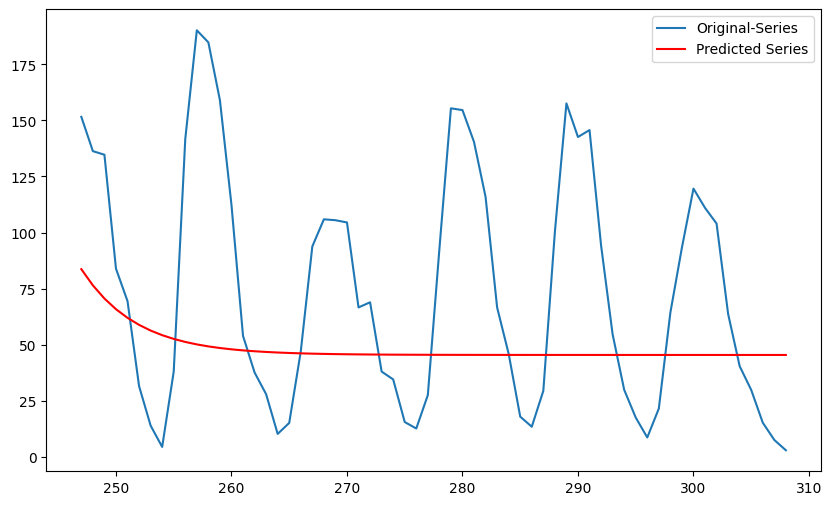

In [27]:
# Setting figure size
plt.figure(figsize=(10,6))
# Plot test data
plt.plot(test.SUNACTIVITY, label='Original-Series')

# Plot predictions
plt.plot(pred, color='red', label='Predicted Series')
# Add legends
plt.legend()
# Display the plot
plt.show()

### Generating Periodic Signals

#### Overview
Periodic signals are common in nature and often exhibit regular patterns. For example:
- **Accurate Clock**: A highly regular and predictable phenomenon.
- **Sunspot Activity**: Exhibits patterns that appear regular but are influenced by multiple cycles.

#### Sunspot Activity Cycles
Using the **Hilbert-Huang Transform**, scientists identified three primary cycles in sunspot activity:
1. **11-Year Cycle**: Short-term cycle.
2. **22-Year Cycle**: Medium-term cycle.
3. **100-Year Cycle**: Long-term cycle.


#### Simulating Periodic Signals
To simulate periodic signals, we use **trigonometric functions** like sine. A periodic signal can be modeled as a **linear combination of multiple sine functions**, where each sine function represents a cycle.

#### Key Concepts
- **Sine Function**: A fundamental trigonometric function used to model periodic behavior.
- **Linear Combination**: Adding multiple sine functions together to represent complex periodic patterns.

#### Example
For the sunspot activity, we can create a model combining three sine functions, each representing one of the identified cycles. This approach requires only minor adjustments to the code used for autoregressive models.

#### Applications
- Modeling natural phenomena like sunspot activity, tides, or seasonal weather patterns.
- Simulating periodic signals for testing and analysis.

In [32]:
# Install missing libraries
%pip install scipy statsmodels matplotlib

# Import required libraries
import numpy as np
import statsmodels.api as sm
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

# Create model function
def model(p, t):
	C, p1, f1, phi1, p2, f2, phi2, p3, f3, phi3 = p
	return C + p1 * np.sin(f1 * t + phi1) + p2 * np.sin(f2 * t + phi2) + p3 * np.sin(f3 * t + phi3)

# Create error function
def error(p, y, t):
	return y - model(p, t)

# Create fit function
def fit(y, t):
	p0 = [y.mean(), 0, 2 * np.pi / 11, 0, 0, 2 * np.pi / 22, 0, 0, 2 * np.pi / 100, 0]
	params = leastsq(error, p0, args=(y, t))[0]
	return params

# Load the dataset
data_loader = sm.datasets.sunspots.load_pandas()
sunspots = data_loader.data["SUNACTIVITY"].values
years = data_loader.data["YEAR"].values

# Apply and fit the model
cutoff = int(0.9 * len(sunspots))
params = fit(sunspots[:cutoff], years[:cutoff])
print("Params", params)
pred = model(params, years[cutoff:])
actual = sunspots[cutoff:]

Note: you may need to restart the kernel to use updated packages.
Params [ 47.18800005  28.89947474   0.56827279   6.51179123   4.55214561
   0.29372078 -14.30927341 -18.16524143   0.06574835  -4.37789139]


In [33]:
print("Root mean square error", np.sqrt(np.mean((actual - pred) **
2)))
print("Mean absolute error", np.mean(np.abs(actual - pred)))
print("Mean absolute percentage error", 100 *
np.mean(np.abs(actual - pred)/actual))
mid = (actual + pred)/2
print("Symmetric Mean absolute percentage error", 100 *
np.mean(np.abs(actual - pred)/mid))
print("Coefficient of determination", 1 - ((actual - pred)
**2).sum()/ ((actual - actual.mean()) ** 2).sum())

Root mean square error 59.56204509203037
Mean absolute error 44.5815752860654
Mean absolute percentage error 65.16452902913994
Symmetric Mean absolute percentage error 78.44803852449202
Coefficient of determination -0.3635310505207059


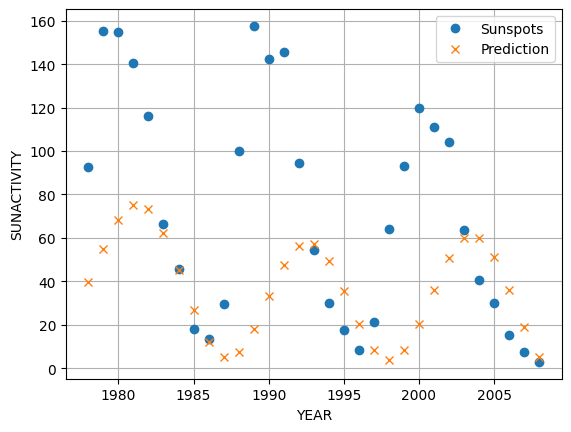

In [35]:
year_range = data_loader.data["YEAR"].values[cutoff:]
# Plot the actual and predicted data points
plt.plot(year_range, actual, 'o', label="Sunspots")
plt.plot(year_range, pred, 'x', label="Prediction")
plt.grid(True)

# Add labels
plt.xlabel("YEAR")
plt.ylabel("SUNACTIVITY")
# Add legend
plt.legend()
# Display the chart
plt.show()

### Fourier Analysis

#### Overview
Fourier analysis is a mathematical technique that represents functions as an infinite series of sine and cosine terms. It was developed by the mathematician Joseph Fourier and is widely used in signal processing and time-series analysis.

#### Key Concepts
- **Fourier Series**: A method to express a function as a sum of sine and cosine terms.
- **Real- or Complex-Valued Functions**: Fourier series can be applied to both real and complex-valued functions.
- **Frequency Spectrum**: Fourier analysis decomposes a signal into its constituent frequencies, providing a frequency spectrum.

#### Fast Fourier Transform (FFT)
The **Fast Fourier Transform (FFT)** is the most efficient algorithm for performing Fourier analysis. It decomposes a signal into different frequency components, enabling the analysis of the frequency spectrum.

#### Key Functions in Python
- **`rfft()`**: Performs FFT on real-valued data. It is suitable for datasets like the Sunspot dataset.
- **`fft()`**: Performs FFT on general data but may produce warnings for certain datasets.
- **`fftshift()`**: Moves the zero-frequency component to the center of the spectrum for better visualization.

#### Libraries
- **SciPy** and **NumPy** provide built-in functions for performing FFT, making it easy to analyze signals and extract frequency components.

#### Applications
- Signal processing
- Time-series analysis
- Frequency domain analysis

Index of max sine FFT [160 157 166 158 154]


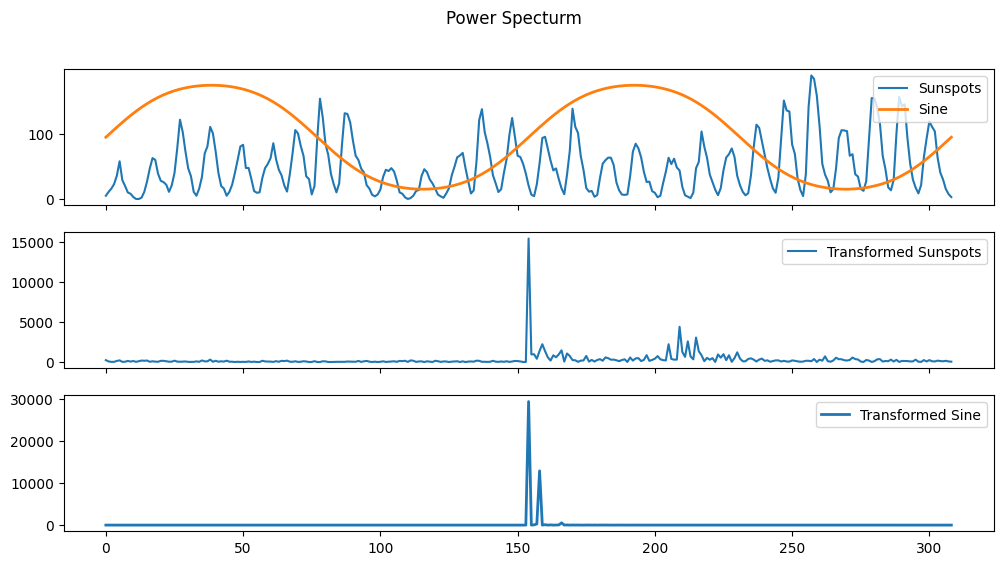

In [37]:
# Import required library
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.fftpack import rfft
from scipy.fftpack import fftshift
# Read the dataset
data = sm.datasets.sunspots.load_pandas().data
# Create Sine wave
t = np.linspace(-2 * np.pi, 2 * np.pi,
len(data.SUNACTIVITY.values))
mid = np.ptp(data.SUNACTIVITY.values)/2
sine = mid + mid * np.sin(np.sin(t))

# Compute FFT for Sine wave
sine_fft = np.abs(fftshift(rfft(sine)))
print("Index of max sine FFT", np.argsort(sine_fft)[-5:])
# Compute FFT for sunspots dataset
transformed = np.abs(fftshift(rfft(data.SUNACTIVITY.values)))

# Create subplots
fig, axs = plt.subplots(3,figsize=(12,6),sharex=True)
fig.suptitle('Power Specturm')
axs[0].plot(data.SUNACTIVITY.values, label="Sunspots")
axs[0].plot(sine, lw=2, label="Sine")
axs[0].legend() # Set legends
axs[1].plot(transformed, label="Transformed Sunspots")

axs[1].legend() # Set legends
axs[2].plot(sine_fft, lw=2, label="Transformed Sine")
axs[2].legend() # Set legends
# Display the chart
plt.show()